# Switch Network Using Pymc3

 __With below network we tried to get idea or the approximation of the life cycle of switch and tried to get the idea of how
the different parameter is affecting the life cycle of switches.__





__ Why Pymc3__ <br>
Pymc3 is developed in python  which support bayesian statistic and probabilitic machine learning with advanced sampling method like monte carlo and Nuts sampling. As most the data scientist  is moving towards python so it quite easy to understand and work on.The fabolus thing with Pymc3 is that it can fit and sample any model regardsless of mathematical validation. Pymc3 can decide by itself which type of sampling method required as per the model and the distribution used in the network. but the only issue with Pymc3 is document is not clear enough for the beginner.  <br>  



__ Why Not Pystan__  <br>
Pystan provides the  interface to stan. It require python 3.5 or the higher version.Pystan has c++ complier although pythan also used bayesian statitics and probablistic machine learning and  have advanced sampling method HMM, MCMC and ADVI but the real issue is createing the model in pystan is not easy enough and sometime it cause juypter notebook to crash.Second issue is after creating the model we have to choose which sampling method we have to apply which require good understanding of how my ditribution output should behave otherwise the result will be completely wrong.



__ Why Not Edward__  <br>

Although we can use use directly our Pymc3 and Pytsan model in Edward but the issue with the edward is documentation is not clear at all and example which is given will confused you more  rather than giving you the hint.



# But why we need sampling at all if we know the statistic and mathematics approach to solve the probelm

First of all the general idea of sampling is to draw every possible outcome of each node and relation between each node
which is available in the network and give as approx expectations <br>

Now consider we have network which have 4 nodes and every node has 3 possible outcome so there is 3*3*3*3= 81 possibel cases for which we need to calculate posterior probabilty based on different condition like inference  which is time consuming and expensive and in the network where very high number of parameter is involved it will become more compilicated. example electrical engines. <br>


The main objective of sampling is to calculate the normalize factor which is integral of likelihood and prior probability on diffrerent probabilty conditions example in 81 cases the normalize factor is 1 but when we apply the inference based on specific given condition probality distribution normalize factor  will not be 1. so we have to again renormalize distribution which we have, depending on the condition and we have to do it multiple time based different conditions But thanks to sampling this things is taken care in different sampling methods <br>


 
__Disadvantage of sampling__

Its is slow because we need to draw lots of sample to get good approximation.






  
__Hint__<br>
As with statiscal modelling and probabilistic machine learning the biggest issue is creating the model which make sense not only mathematically also intuitively. but if we have statistical idea about the probelm how to approach it with given data set the result will be more promising. 


# Case Study To Understand Bayesian Hierarchical Model Using Pymc3

__To study the bayesian hierarchical model we will take a example of switiching model in electrical pumps__
 
 
 For our case study we will take simple network which include following parameters.
 1. Time 
 2. Temparture
 3. Wear
 4. Wear Before  

by using above parameter we will try to predict the life cycle of the switch.<br>

1. Here we get a Time from the user which tell us what is the duration of each switching operation.<br>
2. Temparture is depend on the time. example longer the duration of Time higher is the Temparture.<br>
3. Now if the Temparture is high it will contribute to the Wear Means higher the Temprature will result higher percentage of    Wear.<br>

below you can see the visulaization of the above network which is created using daft package and it will complete the first cycle of the switching operations.










In [2]:
# Importing the required packages
import pandas as pd
import numpy as np
import pymc3 as pm
import daft
import seaborn 
import matplotlib.pyplot as plt

C:\Users\DESUSAI\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


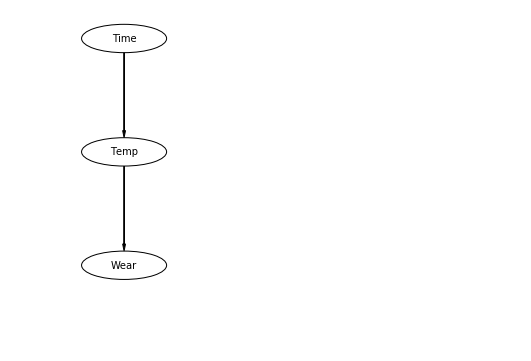

In [3]:
#First Iteration when system is started
pgm = daft.PGM([9,6],origin=[1, 0.5])
pgm.add_node(daft.Node('Time','Time',3,6,aspect=3))
pgm.add_node(daft.Node('Temp','Temp',3,4,aspect=3))
pgm.add_node(daft.Node('Wear','Wear',3,2,aspect=3))
pgm.add_edge('Time','Temp')
pgm.add_edge('Temp','Wear')
pgm.render();

__1. Now from the second switching operation whose Time we will get again from the user we alreadfy have some Wear in the system which is reponsible for Temprature increase <br>__

__2. And the Wear which is already in the system will contribute directly to wear which is going to happen in second switch      operation <br>__


   __As you can see below the visualization of the network from second switching operation till the number of operation user      perform or till the network fail.<br>__




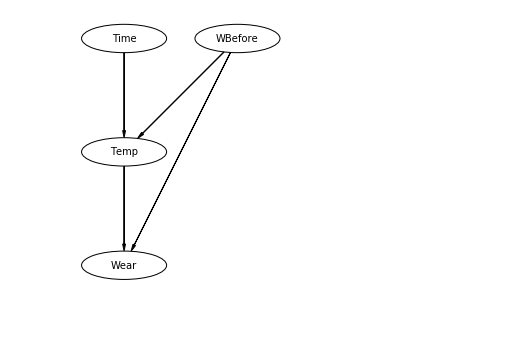

In [4]:
#from seconnd iteration  till system is down
pgm = daft.PGM([9,6],origin=[1, 0.5])
pgm.add_node(daft.Node('Time','Time',3,6,aspect=3))
pgm.add_node(daft.Node('WBefore','WBefore',5,6,aspect=3))
pgm.add_node(daft.Node('Temp','Temp',3,4,aspect=3))
pgm.add_node(daft.Node('Wear','Wear',3,2,aspect=3))
pgm.add_edge('Time','Temp')
pgm.add_edge('WBefore','Temp')
pgm.add_edge('WBefore','Wear')
pgm.add_edge('Temp','Wear')
pgm.render();

__Below is the example of data which we using in our network please note here we just using this file for Time of switching operation hence all the other column is not in use and reason is explained above.__ 

In [5]:
#Importing the file for Time  
df = pd.read_csv('C:/Users/DESUSAI/Desktop/New folder/Temp.csv',sep=';')
df

,Time,Temp,RunningTemp,Wear,Slot
0,1,200,200,16,1
1,1,100,166,13,2
2,1,100,166,12,3
3,1,200,166,20,4
4,1,100,166,15,5


# Wheather my data has any symmetry and why should i bother about it ?


Although it is not important at all that your data is symmetric or not . but doing the symmetric test will give you some idea about what kind of distribution we can use while creating the model which is very important for our  predictions.<br>

1. if skew is coming 0 then our  data is equally distributed towards positive and negative side. Which also mean our mean is    same as our median.<br>
2. if skew is coming -ve  then our  data tailed towards negative side.Now we can say our mean is smaller than our median.  <br>
3. if skew is coming +ve then it is  tailed towards positive side.which means mean is higher than median.<br>


__Is that reaaly helpful to decide the which distribution should i use ?__

The answer is yes. Not exactly but it will give some hints like if data is skewed towards right means whose  Mean towards +ve you cannot apply the distribution whose resulted value may lies in -1 to +1 or -infinity to +infinity.<br> 


Below is the example of our data skewness .

In [6]:
df.skew()


Time           0.000000
Temp           0.608581
RunningTemp    2.236068
Wear           0.933451
Slot           0.000000
dtype: float64

__ Is plotting helpful to decide which distribution we should use  ?__

The answer is again yes. by plotting  we can see the behaviour of our Data and can  decide is it expontiallly rising  or it normal distributed  or something else  . but unfortunately in our case we dont have suffcient amount of data and we did not have measurement of any other node  also. all we have is the relation how one  node is connected to another one. and what is the life cycle of switch.<br> 


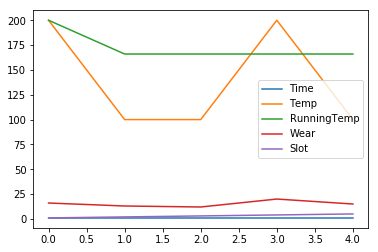

In [7]:
df.plot()
plt.show()

In [7]:
def run_network(Maxlife,iterations):
    frames = []
    loopWear = 0
    for i in range(0,iterations):    
        model = pm.Model();    
        with model:        
            Time = pm.Normal('Time',df.Time[i])
            Temp = pm.Normal('Temp',mu=Time+loopWear)
            wear = pm.Normal('wear',mu=Temp+loopWear)
            changedWear= pm.Normal('changedWear',mu=wear-loopWear)
            trace = pm.sample(10000,tune=5000,progressbar=True)    
            frames.append(pd.DataFrame({
                    "Wear": trace["wear"][5000:],
                    "temp": trace["Temp"][5000:],
                    "time": trace["Time"][5000:],
                    "WearChanged": trace["changedWear"][5000:]}))         
            
            loopWear =frames[i].Wear.mean()
            print(loopWear)
            print(df.Time[i],' sec',round(((Maxlife-loopWear)/Maxlife)*100),'% life is left')
     
    return frames
           
        
        
    


In [8]:
run_network(1000,3)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\DESUSAI\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|███████████████████████████████████| 15000/15000 [00:22<00:00, 675.52it/s]


1.0380174905790733
1  sec 100 % life is left


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\DESUSAI\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|███████████████████████████████████| 15000/15000 [00:22<00:00, 663.06it/s]


3.1241150412700596
1  sec 100 % life is left


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\DESUSAI\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|███████████████████████████████████| 15000/15000 [00:23<00:00, 629.77it/s]


7.323974166423408
1  sec 99 % life is left


[          Wear  WearChanged      temp      time
 0     4.146075     5.766210  2.896054  3.153520
 1     2.371316     1.945796  2.243119  2.474274
 2     1.596765    -0.276949  2.089874  1.444618
 3     4.073286     2.338508  3.041952  1.419148
 4     1.849329     1.927900  0.271756  1.231461
 5     0.534112    -0.197774  0.218222  1.194795
 6    -0.626486    -0.621286 -0.293288 -0.021611
 7    -0.033368    -1.866182  0.947930  1.061396
 8    -1.270543    -0.673745 -0.681148  1.144470
 9     0.640925    -2.041909  1.891791  1.250619
 10   -0.074788     1.872220  0.354329  2.237552
 11   -0.074788     1.872220  0.354329  2.237552
 12    2.327604     0.436503  2.440691  1.090752
 13    0.452691     1.078043  1.732959  1.672710
 14    0.206962     0.108911  0.998006  1.298083
 15    1.675534     1.992263  0.804244 -0.132797
 16    0.424264     0.567952  0.141542  1.446456
 17    0.721977    -0.750065  2.172494  2.270712
 18   -0.643292    -0.190174  0.317169  1.686589
 19   -1.294169    -